
# **Sentiment Analysis Using Deep learning**
# **Without TFIDF**
# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Loading Dataset**

In [ ]:
df = pd.read_csv(r"/content/Twitter_Data.csv")

In [ ]:
df.shape

(186517, 2)

In [ ]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186517 entries, 0 to 186516
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  186510 non-null  object 
 1   category    186502 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.8+ MB


In [ ]:
df['clean_text'] = df['clean_text'].astype('str')

In [ ]:
df.isnull().sum()

clean_text     0
category      15
dtype: int64

In [ ]:
df = df.dropna()

# **Data Cleaning**

In [ ]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
stopwords_english = stopwords.words('english')
# Removing Stopwords
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))
# removing punctuations
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
df['clean_text'][0]

'modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples'

# **Data Visualization**

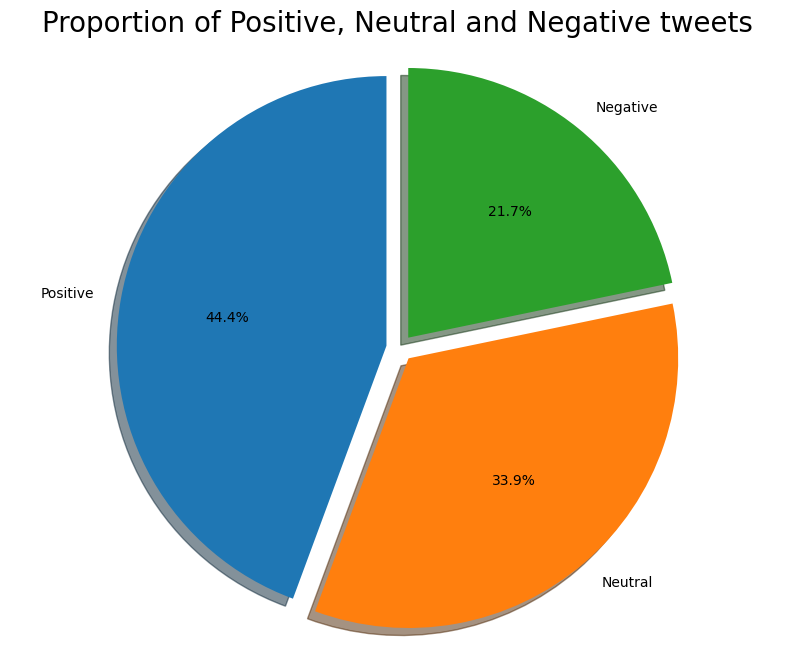

In [ ]:
labels = ['Positive', 'Neutral', 'Negative']
sizes = [df.category[df['category']==1].count(), df.category[df['category']==0].count(),df.category[df['category']==-1].count()]
explode = (0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Positive, Neutral and Negative tweets", size = 20)
plt.show()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
positive_wc = wc.generate(df[df['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(df[df['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(df[df['category'] == -1.0]['clean_text'].str.cat(sep = " "))

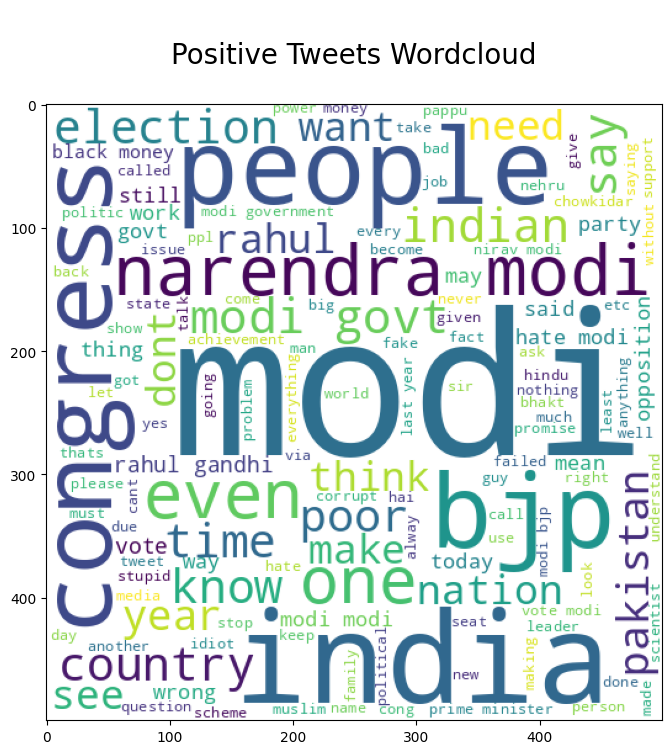

In [ ]:
plt.figure(figsize = (8, 8))
plt.title("\nPositive Tweets Wordcloud\n", size = 20)
plt.imshow(positive_wc)

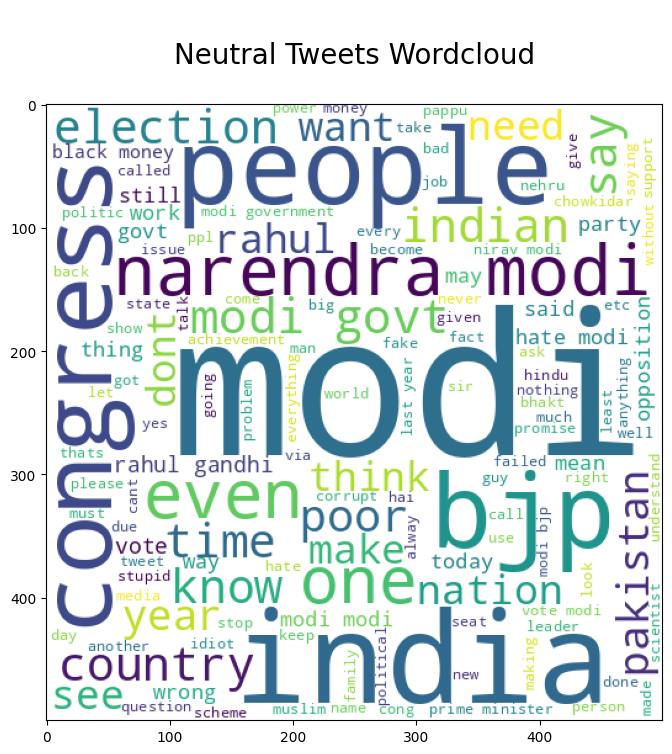

In [ ]:
plt.figure(figsize = (8, 8))
plt.title("\nNeutral Tweets Wordcloud\n", size = 20)
plt.imshow(neutral_wc)

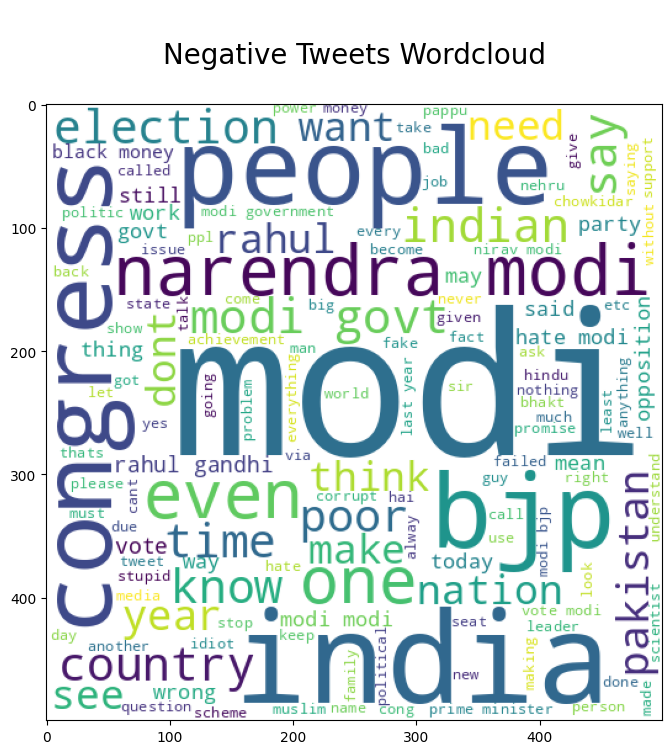

In [ ]:
plt.figure(figsize = (8, 8))
plt.title("\nNegative Tweets Wordcloud\n", size = 20)
plt.imshow(negative_wc)

# **Stemming the words**

In [ ]:
stemmer = PorterStemmer()
def stemming(word):
    list1=[]
    for i in word.split():
        list1.append(stemmer.stem(i))
    return ' '.join(list1)

df['clean_text'] = df['clean_text'].apply(lambda x:stemming(x))

In [ ]:
df['category'] = [2 if x == -1 else x for x in df['category']]

In [ ]:
df.category.value_counts()

category
1.0    82739
0.0    63215
2.0    40548
Name: count, dtype: int64

In [ ]:
df.head(5)

,clean_text,category
0,modi promis minimum govern maximum govern expe...,2.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


# **Tokenization**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.clean_text)
word_index = tokenizer.word_index

In [ ]:
vocab_size = len(word_index)+1

# **Padding the Tweets**

In [ ]:
max_length = 200
lines = pad_sequences(tokenizer.texts_to_sequences(df.clean_text), maxlen = max_length)

In [ ]:
df.clean_text = lines.tolist()

In [ ]:
X = df['clean_text']
y = df['category']

In [ ]:
df.head()

,clean_text,category
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0


# **Splitting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train = np.vstack(X_train.values)
y_train = np.vstack(y_train.values)

X_test = np.vstack(X_test.values)
y_test = np.vstack(y_test.values)


# **Sequential Data Modelling**

In [ ]:
model = tf.keras.Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim=200,trainable=True))

# LSTM layer
model.add(LSTM(64, activation='tanh'))

# Fully connected layer
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         17711400  
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 17783595 (67.84 MB)
Trainable params: 17783595 (67.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Now Adding Optimizer, Loss Function and training the model**

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2, batch_size=512, verbose=1,shuffle=True,validation_data=(X_test,y_test))

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


292/292 [==============================] - 650s 2s/step - loss: 0.5550 - accuracy: 0.7797 - val_loss: 0.3981 - val_accuracy: 0.8585
Epoch 2/2
292/292 [==============================] - 652s 2s/step - loss: 0.3231 - accuracy: 0.8889 - val_loss: 0.3845 - val_accuracy: 0.8634


# **Accuracy and Loss of Test data**

In [ ]:
predictions = model.predict(X_test)
print(history.history)

1166/1166 [==============================] - 85s 72ms/step
{'loss': [0.5549654364585876, 0.3230755031108856], 'accuracy': [0.7796931862831116, 0.8889283537864685], 'val_loss': [0.3981080651283264, 0.3845406472682953], 'val_accuracy': [0.8585024476051331, 0.8634085059165955]}


# **Model Evaluation**

In [ ]:
print("Evaluating on test data")
results = model.evaluate(X_test, y_test, batch_size=128)

print("test loss: ", results[0])
print("Model's Accuracy on Test Data: ",results[1])

Evaluating on test data
292/292 [==============================] - 53s 182ms/step - loss: 0.3845 - accuracy: 0.8634
test loss:  0.3845406472682953
Model's Accuracy on Test Data:  0.8634085059165955


Accuracy on Test Data Comes out to be: 86.34 %